C:\Users\SS3\Anaconda2\envs\PythonData\lib\site-packages\ipykernel\__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\SS3\Anaconda2\envs\PythonData\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\SS3\Anaconda2\envs\PythonData\lib\site-packages\ipykernel\__main__.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

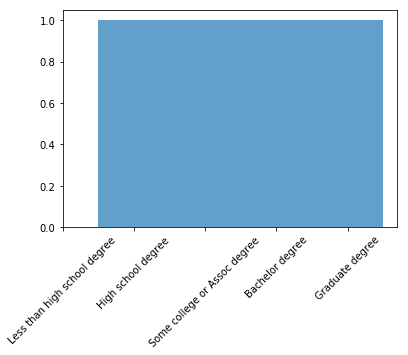

In [45]:
#This is the primary Coding module for the project \"The Annals of Dagobah\" by the group The Data Swamp Sages of Dagobah.\n",
   
%matplotlib inline
   
# Dependencies and Setup\
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
# File to Load ",
path_StarWars = "Resources/StarWars.csv"
    
df_StarWars = pd.read_csv(path_StarWars, encoding='iso8859_2')
    
#Generate and Normalize Total Population Histogram
#-------------------------------------

df_NoNull = df_StarWars.dropna(subset=['Education','StarTrek_Fan', 'SW_Fan'])
df_NoNull.head()
df_SW_cln = df_NoNull

NoNull_edu_grpd = df_NoNull.groupby('Education')['SW_Fan'].count()
df_NoNull_edu_grpd = pd.DataFrame(NoNull_edu_grpd)
#print(df_NoNull_edu_grpd)

dict_freq = {}
ser_index = df_NoNull_edu_grpd.index.get_values()

ctr = 0
for index in ser_index:
    #print(index)
    #print(df_NoNull_edu_grpd.iloc[ctr,0])
    dict_freq[index] = df_NoNull_edu_grpd.iloc[ctr,0]
    ctr += 1
    #print(dict_freq)    

df_SW_cln['Score_Weight']=df_SW_cln['Education']

df_SW_cln['Score_Weight'].replace(to_replace='Less than high school degree',value=(1/dict_freq['Less than high school degree']),inplace=True)
df_SW_cln['Score_Weight'].replace(to_replace='High school degree',value=(1/dict_freq['High school degree']),inplace=True)
df_SW_cln['Score_Weight'].replace(to_replace='Some college or Associate degree',value=(1/dict_freq['Some college or Associate degree']),inplace=True)
df_SW_cln['Score_Weight'].replace(to_replace='Bachelor degree',value=(1/dict_freq['Bachelor degree']),inplace=True)
df_SW_cln['Score_Weight'].replace(to_replace='Graduate degree',value=(1/dict_freq['Graduate degree']),inplace=True)
ser_ScoreWeight = df_SW_cln['Score_Weight']

#print(ser_EduScore)
#print(df_SW_cln)

df_SW_cln['Education_Score']=df_SW_cln['Education']

df_SW_cln['Education_Score'].replace(to_replace='Less than high school degree',value=1,inplace=True)
df_SW_cln['Education_Score'].replace(to_replace='High school degree',value=2,inplace=True)
df_SW_cln['Education_Score'].replace(to_replace='Some college or Associate degree',value=3,inplace=True)
df_SW_cln['Education_Score'].replace(to_replace='Bachelor degree',value=4,inplace=True)
df_SW_cln['Education_Score'].replace(to_replace='Graduate degree',value=5,inplace=True)
ser_EduScore = df_SW_cln['Education_Score']




bin_labels = ['Less than high school degree','High school degree','Some college or Assoc degree','Bachelor degree','Graduate degree']


# Histogram Plot of Data
plt.subplot()
plt.hist(ser_EduScore, bins=5, density=False, weights=ser_ScoreWeight, alpha=0.7, label="Education Level")
#x,labels=plt.xticks()
#print(x)
#print(labels)

plt.xticks([0.5,1.5,2.5,3.5,4.5],bin_labels,rotation=45)
#plt.xticks(label=bin_labels)
plt.show()

#print(df_StarWars_Yes_NoNull)




411


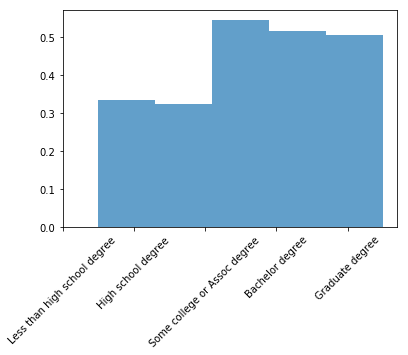

In [50]:
#Generate Star Treck fans from Staw Wars fan population Histogram
#---------------------------------------------------------------- 

df_ST_Yes = df_SW_cln.loc[(df_SW_cln['StarTrek_Fan']=='Yes')]
print(len(df_ST_Yes))

ser_EduScore2 = df_ST_Yes['Education_Score']
ser_EduWeight2 = df_ST_Yes['Score_Weight']

bin_labels = ['Less than high school degree','High school degree','Some college or Assoc degree','Bachelor degree','Graduate degree']


# Histogram Plot of Data
plt.subplot()
plt.hist(ser_EduScore2, bins=5, density=True, weights=ser_EduWeight2, alpha=0.7, label="Education Level")
#x,labels=plt.xticks()
#print(x)
#print(labels)

plt.xticks([0.5,1.5,2.5,3.5,4.5],bin_labels,rotation=45)
#plt.xticks(label=bin_labels)
plt.show()

539
367


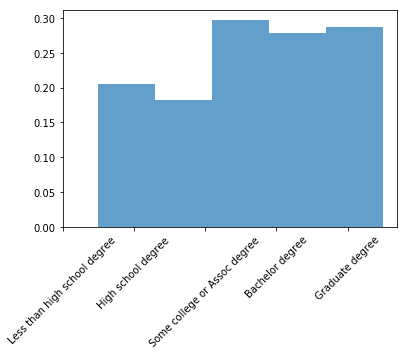

In [51]:
#Generate Star Treck fans from Staw Wars fan population Histogram
#----------------------------------------------------------------   
df_SW_Yes = df_SW_cln.loc[(df_SW_cln['SW_Fan']=='Yes')]
print(len(df_SW_Yes))

df_SW_Yes_ST_Yes = df_SW_Yes.loc[(df_SW_Yes['StarTrek_Fan']=='Yes')]
print(len(df_SW_Yes_ST_Yes))

#df_SWST_NoNull = df_SW_Yes_ST_Yes.dropna(subset=['Education','StarTrek_Fan'])
#df_SWST_NoNull.head()

#ser_EduScore3 = df_SWST_NoNull['Education_Score']
#ser_EduWeight3 = df_SWST_NoNull['Score_Weight']

ser_EduScore3 = df_SW_Yes_ST_Yes['Education_Score']
ser_EduWeight3 = df_SW_Yes_ST_Yes['Score_Weight']


bin_labels = ['Less than high school degree','High school degree','Some college or Assoc degree','Bachelor degree','Graduate degree']


# Histogram Plot of Data
plt.subplot()
plt.hist(ser_EduScore3, bins=5, density=True, weights=ser_EduWeight3, alpha=0.7, label="Education Level")
#x,labels=plt.xticks()
#print(x)
#print(labels)

plt.xticks([0.5,1.5,2.5,3.5,4.5],bin_labels,rotation=45)
#plt.xticks(label=bin_labels)
plt.show()

